# Demand for Electric Bicycles

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting. Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient.

## Assignment

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric bicycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric bicycles in the Indian market.

The company wants to know:

* Which variables are significant in predicting the demand for shared electric bicycles in the Indian market?
* How well do those variables describe the electric bicycle demand.

## Data Description

The file `london_bike_sharing.csv` contains the usage data aggregated by the hour with the following columns:

* `datetime` - beginning of an hour for which the data are aggregated;
* `season`
    * 1: spring,
    * 2: summer,
    * 3: fall,
    * 4: winter;
* `holiday` - whether a day is a holiday or not
* `workingday` - if a day is neither weekend nor holiday is 1, otherwise is 0.
* `weather`
    * 1: clear, few clouds, scattered clouds
    * 2: mist + cloudy, mist + scattered clouds, mist + few clouds, mist
    * 3: light snow, light rain + thunderstorm + scattered clouds, light rain + scattered clouds
    * 4: heavy rain + ice pallets + thunderstorm + mist, snow + fog
* `temp` - air temperature in degrees Celsius
* `atemp` - feeling temperature in degrees Celsius
* `humidity` - air humidity in percent
* `windspeed` - wind speed in km/h
* `casual` - number of bikes rented by casual users
* `registered` - number of bikes rented by registered users
* `count` - total number of rented bikes including both casual and registered users

**Data Source**: [Kaggle](https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset)



### Metadata:
"timestamp" - timestamp field for grouping the data
"cnt" - the count of a new bike shares
"t1" - real temperature in C
"t2" - temperature in C "feels like"
"hum" - humidity in percentage
"wind_speed" - wind speed in km/h
"weather_code" - category of the weather
"is_holiday" - boolean field - 1 holiday / 0 non holiday
"is_weekend" - boolean field - 1 if the day is weekend
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

## Data Preparation

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv("data/london_bike_sharing.csv")

# Preview the data
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
# Variable information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


#### Convert the "timestamp" column to datetime type

In [4]:
# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
# Variable information
df['timestamp'].dtype

dtype('<M8[ns]')

In [5]:
# 
df['timestamp'].dt.year.value_counts()

timestamp
2016    8699
2015    8643
2017      72
Name: count, dtype: int64

#### Create a categorical column for "season"

0-spring ; 1-summer; 2-fall; 3-winter.

In [6]:
# Create the column
df['season_cat'] = df['season'].astype('str').replace({'0.0': 'Spring', '1.0': 'Summer', '2.0': 'Fall', '3.0': 'Winter'})

In [7]:
# Value counts
print(df['season'].value_counts())
print('----------------------------------------')
print(df['season_cat'].value_counts())

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64
----------------------------------------
season_cat
Spring    4394
Summer    4387
Winter    4330
Fall      4303
Name: count, dtype: int64


#### Create a categorical column for "weather_code"

"weather_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [8]:
# Create the categorical column called "weather"
df['weather'] = df['weather_code'].astype('str').replace({'1.0': 'clear', '2.0': 'scattered_clouds', '3.0': 'broken_clouds', '4.0': 'cloudy', '7.0': 'rain', '10.0': 'thunderstorm', '26.0': 'snowfall', '94.0': 'freezing_fog'})

In [9]:
print(df['weather'].value_counts())

weather
clear               6150
scattered_clouds    4034
broken_clouds       3551
rain                2141
cloudy              1464
snowfall              60
thunderstorm          14
Name: count, dtype: int64


#### Year-Month column


In [10]:
# Year-Month column
df['date'] = df['timestamp'].dt.to_period('M')

## Exploratory Data Analysis

#### How the number of bikes changes in each season

There were more bikes shared during Summer than there were in the other seasons. On the other hand, people use less bikes during Winter.

<br/>
<img src="assets/TotalBikesSharedbySeason.jpg" width="1000"/>

#### How the number of bikes changes in each weather

People tend to use and share bikes when the weather is clear and less when the weather is extreme.

<br/>
<img src="assets/TotalBikesSharedbyWeather.png" width="1000"/>

#### How the number of bikes shared overtime

This graph gives more information on the effect of the weather and season on the number of bikes used.

<br/>
<img src="assets/TotalBikesSharedOvertime.png" width="1000"/>

In [11]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_cat,weather,date
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter,broken_clouds,2015-01
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Winter,clear,2015-01
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Winter,clear,2015-01
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Winter,clear,2015-01
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Winter,clear,2015-01


#### Number of bikes vs real temperature (Celsius)

There seem to be a moderate positive correlation between temperature(Celsius) and "The number of bikes shared". As temperature increases the number of bikes shared increases as well.

In [12]:
df['t1'].corr(df['cnt'])

0.3887984512547305

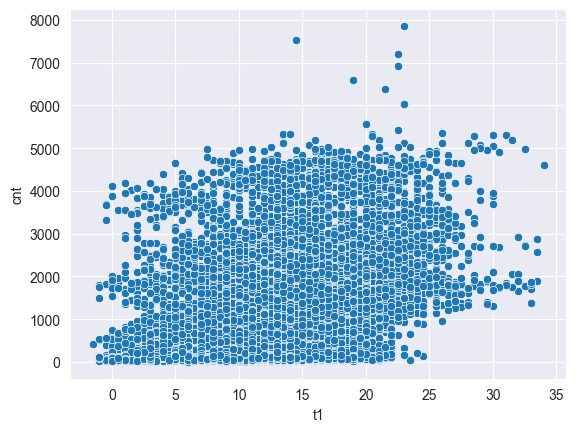

In [13]:
sns.scatterplot(x='t1', y='cnt', data=df)
plt.show()

#### Number of bikes vs humidity

There seem to be a moderate negative correlation between "Humidity" and "The number of bikes shared". As humidity increases the number of bikes shared decreases.

In [14]:
df['hum'].corr(df['cnt'])

-0.4629009648427374

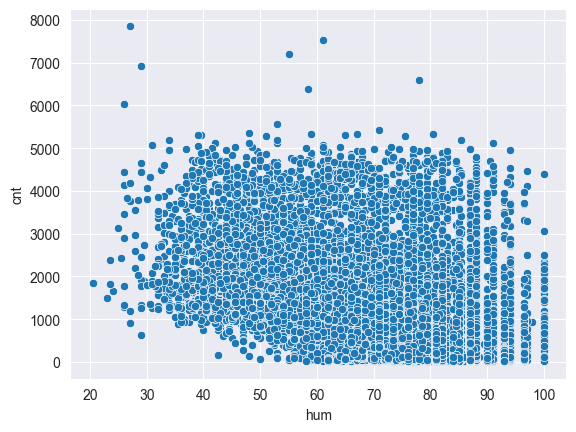

In [15]:
sns.scatterplot(x='hum', y='cnt', data=df)
plt.show()

#### Number of bikes vs wind speed

There seem to be a weak positive correlation between wind speed and The number of bikes shared. As wind speed increases the number of bikes shared slightly increases as well.

In [16]:
df['wind_speed'].corr(df['cnt'])

0.1162952313093768

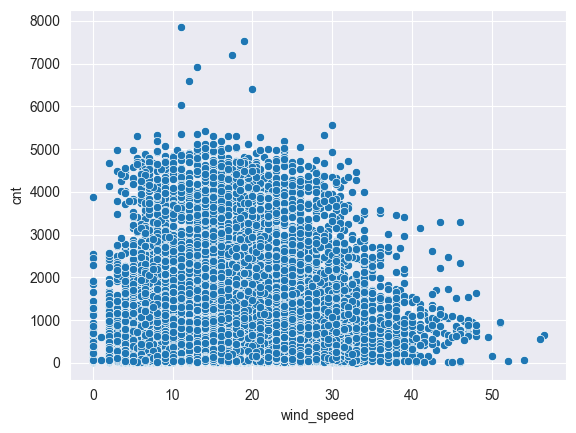

In [17]:
sns.scatterplot(x='wind_speed', y='cnt', data=df)
plt.show()

## BUILDING THE MODEL

In [18]:
import statsmodels.api as sm

In [19]:
df.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_cat,weather,date
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter,broken_clouds,2015-01
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Winter,clear,2015-01
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Winter,clear,2015-01


In [20]:
# Drops all the features that we will not use in our model
features = df.drop(columns=["timestamp", "season", "weather_code", "date", "cnt"])

# Creating dummy variables for the categorical features
X = pd.get_dummies(features, columns=["season_cat", "weather"], drop_first=True)

# Creating the target value
y = df["cnt"].astype('int')

In [21]:
X.head(3)

,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_cat_Spring,season_cat_Summer,season_cat_Winter,weather_clear,weather_cloudy,weather_rain,weather_scattered_clouds,weather_snowfall,weather_thunderstorm
0,3.0,2.0,93.0,6.0,0.0,1.0,False,False,True,False,False,False,False,False,False
1,3.0,2.5,93.0,5.0,0.0,1.0,False,False,True,True,False,False,False,False,False
2,2.5,2.5,96.5,0.0,0.0,1.0,False,False,True,True,False,False,False,False,False


In [22]:
#
for i in ['is_holiday', 'is_weekend']:
    X[i] = X[i].astype('int')
    
#
for i in ['season_cat_Spring', 'season_cat_Summer', 'season_cat_Winter', 'weather_clear', 'weather_cloudy', 'weather_rain', 'weather_scattered_clouds', 'weather_snowfall', 'weather_thunderstorm']:
    X[i] = X[i].astype('int')

In [23]:
X.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_cat_Spring,season_cat_Summer,season_cat_Winter,weather_clear,weather_cloudy,weather_rain,weather_scattered_clouds,weather_snowfall,weather_thunderstorm
0,3.0,2.0,93.0,6.0,0,1,0,0,1,0,0,0,0,0,0
1,3.0,2.5,93.0,5.0,0,1,0,0,1,1,0,0,0,0,0
2,2.5,2.5,96.5,0.0,0,1,0,0,1,1,0,0,0,0,0
3,2.0,2.0,100.0,0.0,0,1,0,0,1,1,0,0,0,0,0
4,2.0,0.0,93.0,6.5,0,1,0,0,1,1,0,0,0,0,0


#### Which variables are significant in predicting the demand for shared electric bicycles in the Indian market?

The top variables with a significant impact in predicting the demand for shared electric bicycles in the Indian market are the **temperature**, the **time of season**, and the **weather condition**. For every increase in temperature, there is an increase of 97.7298 bikes that are been shared, holding everything else constant. This also shows that when temperature warmer people tend to bike more than in a colder temperature. For every Summer and Spring seasons, the number of bike shared decreases by 200.6393 and 112.8692 respectively compared to Fall. In the Winter, the number of bike shared increases by 14.2068 compared to Fall. 

In [24]:
df.head(1)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_cat,weather,date
0,2015-01-04,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter,broken_clouds,2015-01


In [25]:
X_sm = sm.add_constant(X)

In [26]:
res = sm.OLS(y, X_sm).fit()

In [27]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     475.0
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:22:46   Log-Likelihood:            -1.4343e+05
No. Observations:               17414   AIC:                         2.869e+05
Df Residuals:                   17398   BIC:                         2.870e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### How well do those variables describe the electric bicycle demand.

29.1% of the data is explained by these variables

In [28]:
df['weather'].unique()

array(['broken_clouds', 'clear', 'cloudy', 'rain', 'scattered_clouds',
       'snowfall', 'thunderstorm'], dtype=object)